In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np

warnings.filterwarnings("ignore")

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## Read Data

In [88]:
df = pd.read_csv("factbookv3.csv")
df

,Country,Continent,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,United States,America,9631418,14.14,"-646,500,000,000.00",8.25,3.660000e+12,3.839000e+12,7.950000e+11,1.175000e+13,...,77.71,3.3,"640,900,000,000.00","19,650,000","295,734,134",65.0,228464.0,"85,940,000,000.00",2.08,5.5
1,Norway,Europe,324220,11.67,"30,520,000,000.00",9.45,1.074000e+11,1.259000e+11,7.664000e+10,1.830000e+11,...,79.40,1.9,"4,100,000,000.00","171,100","4,593,041",33.1,4077.0,NaN,1.78,4.3
2,Hong Kong,Asia,1092,7.23,"14,850,000,000.00",5.98,3.845000e+10,3.551000e+10,2.681000e+11,2.345000e+11,...,81.39,NaN,"680,900,000.00","257,000","6,898,686",2.1,NaN,"123,600,000,000.00",0.91,6.7
3,Switzerland,Europe,41290,9.77,"40,950,000,000.00",8.48,5.453000e+10,6.347000e+10,1.307000e+11,2.519000e+11,...,80.39,1.0,"3,093,000,000.00","290,400","7,489,370",57.2,4533.0,"69,580,000,000.00",1.42,3.4
4,Denmark,Europe,43094,11.36,"6,529,000,000.00",10.43,3.163000e+10,3.638000e+10,7.306000e+10,1.744000e+11,...,77.62,1.5,"5,280,000,000.00","218,000","5,432,335",42.5,3002.0,"37,980,000,000.00",1.74,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Madagascar,Africa,587040,41.66,"-281,900,000.00",11.35,7.814000e+08,8.402000e+08,8.682000e+08,1.456000e+10,...,56.95,1.2,NaN,"13,000","18,040,341",NaN,732.0,"500,300,000.00",5.66,NaN
145,Yemen,Asia,527970,43.07,"369,900,000.00",8.53,2.827000e+09,3.040000e+09,4.468000e+09,1.625000e+10,...,61.75,7.8,-,"78,000","20,727,063",46.4,NaN,"5,300,000,000.00",6.67,35.0
146,Tanzania,Africa,945087,38.16,"-327,400,000.00",16.71,2.566000e+09,2.727000e+09,1.248000e+09,2.371000e+10,...,45.24,0.2,NaN,"17,000","36,766,356",5.0,3690.0,"2,175,000,000.00",5.06,NaN
147,Burundi,Africa,27830,39.66,"-59,500,000.00",17.43,1.378000e+08,1.320000e+08,3.184000e+07,4.001000e+09,...,43.50,6.0,NaN,"2,750","6,370,609",NaN,NaN,"76,890,000.00",5.81,NaN


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              149 non-null    object 
 1   Continent                            149 non-null    object 
 2   Area                                 149 non-null    int64  
 3   Birth rate                           149 non-null    float64
 4   Current account balance              149 non-null    object 
 5   Death rate                           149 non-null    float64
 6   Electricity consumption              149 non-null    float64
 7   Electricity production               149 non-null    float64
 8   Exports                              149 non-null    float64
 9   GDP                                  149 non-null    float64
 10  GDP per capita                       149 non-null    int64  
 11  GDP real growth rate            

## Exploratory Data Analysis

In [90]:
df.columns

Index(['Country', 'Continent', 'Area', 'Birth rate', 'Current account balance',
       'Death rate', 'Electricity consumption', 'Electricity production',
       'Exports', 'GDP', 'GDP per capita', 'GDP real growth rate', 'Highways',
       'Imports', 'Industrial production growth rate', 'Infant mortality rate',
       'Inflation rate', 'Internet users', 'Investment', 'Labor force',
       'Life expectancy at birth', 'Military expenditures',
       'Natural gas consumption', 'Oil consumption', 'Population',
       'Public debt', 'Railways', 'Reserves of foreign exchange & gold',
       'Total fertility rate', 'Unemployment rate'],
      dtype='object')

In [91]:
correlation_with_gdp_per_capita = df.corr()["GDP per capita"].sort_values(
    ascending=False
)

print(correlation_with_gdp_per_capita)

GDP per capita                       1.000000
Life expectancy at birth             0.615375
Exports                              0.586126
Imports                              0.542316
Railways                             0.368462
Electricity consumption              0.339576
Electricity production               0.336479
GDP                                  0.321518
Highways                             0.302031
Area                                 0.126721
Military expenditures               -0.027604
Investment                          -0.071615
Public debt                         -0.091275
GDP real growth rate                -0.145689
Industrial production growth rate   -0.196741
Death rate                          -0.228799
Inflation rate                      -0.249436
Unemployment rate                   -0.428489
Total fertility rate                -0.562178
Birth rate                          -0.640079
Infant mortality rate               -0.645404
Name: GDP per capita, dtype: float

In [92]:
df.isna().sum()

Country                                 0
Continent                               0
Area                                    0
Birth rate                              0
Current account balance                 0
Death rate                              0
Electricity consumption                 0
Electricity production                  0
Exports                                 0
GDP                                     0
GDP per capita                          0
GDP real growth rate                    0
Highways                                0
Imports                                 0
Industrial production growth rate      15
Infant mortality rate                   0
Inflation rate                          0
Internet users                          0
Investment                              5
Labor force                             9
Life expectancy at birth                0
Military expenditures                   5
Natural gas consumption                47
Oil consumption                   

In [93]:
df.columns

Index(['Country', 'Continent', 'Area', 'Birth rate', 'Current account balance',
       'Death rate', 'Electricity consumption', 'Electricity production',
       'Exports', 'GDP', 'GDP per capita', 'GDP real growth rate', 'Highways',
       'Imports', 'Industrial production growth rate', 'Infant mortality rate',
       'Inflation rate', 'Internet users', 'Investment', 'Labor force',
       'Life expectancy at birth', 'Military expenditures',
       'Natural gas consumption', 'Oil consumption', 'Population',
       'Public debt', 'Railways', 'Reserves of foreign exchange & gold',
       'Total fertility rate', 'Unemployment rate'],
      dtype='object')

In [94]:
drop = df[['Railways', 'Natural gas consumption']] #menghapus kolom yg tidak terlalu memengaruhi tingkat kesejahteraan suatu negara

df = df.drop(drop, axis=1)
df

,Country,Continent,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,...,Investment,Labor force,Life expectancy at birth,Military expenditures,Oil consumption,Population,Public debt,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,United States,America,9631418,14.14,"-646,500,000,000.00",8.25,3.660000e+12,3.839000e+12,7.950000e+11,1.175000e+13,...,15.7,"147,400,000",77.71,3.3,"19,650,000","295,734,134",65.0,"85,940,000,000.00",2.08,5.5
1,Norway,Europe,324220,11.67,"30,520,000,000.00",9.45,1.074000e+11,1.259000e+11,7.664000e+10,1.830000e+11,...,17.5,"2,380,000",79.40,1.9,"171,100","4,593,041",33.1,NaN,1.78,4.3
2,Hong Kong,Asia,1092,7.23,"14,850,000,000.00",5.98,3.845000e+10,3.551000e+10,2.681000e+11,2.345000e+11,...,22.7,"3,540,000",81.39,NaN,"257,000","6,898,686",2.1,"123,600,000,000.00",0.91,6.7
3,Switzerland,Europe,41290,9.77,"40,950,000,000.00",8.48,5.453000e+10,6.347000e+10,1.307000e+11,2.519000e+11,...,20.4,"3,770,000",80.39,1.0,"290,400","7,489,370",57.2,"69,580,000,000.00",1.42,3.4
4,Denmark,Europe,43094,11.36,"6,529,000,000.00",10.43,3.163000e+10,3.638000e+10,7.306000e+10,1.744000e+11,...,19.8,"2,870,000",77.62,1.5,"218,000","5,432,335",42.5,"37,980,000,000.00",1.74,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Madagascar,Africa,587040,41.66,"-281,900,000.00",11.35,7.814000e+08,8.402000e+08,8.682000e+08,1.456000e+10,...,14.7,"7,300,000",56.95,1.2,"13,000","18,040,341",NaN,"500,300,000.00",5.66,NaN
145,Yemen,Asia,527970,43.07,"369,900,000.00",8.53,2.827000e+09,3.040000e+09,4.468000e+09,1.625000e+10,...,16.1,"5,980,000",61.75,7.8,"78,000","20,727,063",46.4,"5,300,000,000.00",6.67,35.0
146,Tanzania,Africa,945087,38.16,"-327,400,000.00",16.71,2.566000e+09,2.727000e+09,1.248000e+09,2.371000e+10,...,16.2,"19,000,000",45.24,0.2,"17,000","36,766,356",5.0,"2,175,000,000.00",5.06,NaN
147,Burundi,Africa,27830,39.66,"-59,500,000.00",17.43,1.378000e+08,1.320000e+08,3.184000e+07,4.001000e+09,...,10.7,"2,990,000",43.50,6.0,"2,750","6,370,609",NaN,"76,890,000.00",5.81,NaN


In [95]:
df.describe()

,Area,Birth rate,Death rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,GDP real growth rate,Highways,Imports,Industrial production growth rate,Infant mortality rate,Inflation rate,Investment,Life expectancy at birth,Military expenditures,Public debt,Total fertility rate,Unemployment rate
count,1.490000e+02,149.000000,149.000000,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,149.000000,149.000000,1.490000e+02,1.490000e+02,134.000000,149.000000,149.000000,144.000000,149.000000,144.000000,108.000000,149.000000,127.000000
mean,8.257403e+05,21.889799,9.861812,9.799001e+10,1.064714e+11,5.859074e+10,3.708393e+11,10094.865772,5.300671,1.842000e+05,5.847236e+10,6.246269,36.458658,6.987248,21.747222,66.931611,2.666944,55.896296,2.882416,14.470079
std,2.152585e+06,11.003152,5.091107,3.499644e+11,3.744757e+11,1.342214e+11,1.226427e+12,10272.729346,5.705421,6.129536e+05,1.583942e+11,5.483600,33.241462,12.539372,8.120895,12.324980,2.449401,36.954000,1.521460,12.776176
min,3.160000e+02,7.230000,2.420000,1.581000e+07,1.700000e+07,6.700000e+06,2.140000e+08,600.000000,-8.200000,3.200000e+02,4.100000e+07,-7.800000,2.290000,-0.300000,8.000000,33.870000,0.200000,2.100000,0.910000,0.600000
25%,5.110000e+04,12.030000,6.260000,2.827000e+09,3.571000e+09,1.629000e+09,1.566000e+10,2200.000000,3.000000,1.271900e+04,1.972000e+09,3.000000,8.570000,2.300000,17.175000,61.390000,1.300000,31.475000,1.710000,6.100000
50%,2.076000e+05,18.780000,8.680000,1.021000e+10,1.249000e+10,6.184000e+09,4.800000e+10,6300.000000,4.800000,3.729900e+04,7.318000e+09,5.000000,24.520000,4.100000,19.850000,71.550000,1.900000,50.750000,2.440000,10.400000
75%,5.826500e+05,29.740000,11.810000,5.509000e+10,6.347000e+10,3.879000e+10,2.272000e+11,14300.000000,6.100000,9.573600e+04,3.942000e+10,8.375000,61.500000,7.600000,24.550000,76.140000,3.100000,69.675000,3.870000,18.000000
max,1.707520e+07,47.390000,29.360000,3.660000e+12,3.839000e+12,8.933000e+11,1.175000e+13,40100.000000,52.300000,6.393603e+06,1.476000e+12,30.000000,191.190000,133.000000,65.100000,81.620000,14.600000,228.300000,6.740000,70.000000


## KMeans Clustering

#### Clustering Berdasarkan GDP Per Capita
Tidak menyertakan kolom yang memiliki missing value, hanya menyertakan kolom yang menjadi metrics suatu negara dapat dikatakan sejahtera ataupun maju

In [96]:
clus = df[['Country', 'Continent', 'GDP per capita', 'Death rate', 'Exports', 'Imports', 'Infant mortality rate', 'Life expectancy at birth', 'Unemployment rate', 'Birth rate']] #pilih kolom
clus

,Country,Continent,GDP per capita,Death rate,Exports,Imports,Infant mortality rate,Life expectancy at birth,Unemployment rate,Birth rate
0,United States,America,40100,8.25,7.950000e+11,1.476000e+12,6.50,77.71,5.5,14.14
1,Norway,Europe,40000,9.45,7.664000e+10,4.596000e+10,3.70,79.40,4.3,11.67
2,Hong Kong,Asia,34200,5.98,2.681000e+11,2.759000e+11,2.97,81.39,6.7,7.23
3,Switzerland,Europe,33800,8.48,1.307000e+11,1.211000e+11,4.39,80.39,3.4,9.77
4,Denmark,Europe,32200,10.43,7.306000e+10,6.345000e+10,4.56,77.62,6.2,11.36
...,...,...,...,...,...,...,...,...,...,...
144,Madagascar,Africa,800,11.35,8.682000e+08,1.147000e+09,76.83,56.95,NaN,41.66
145,Yemen,Asia,800,8.53,4.468000e+09,3.734000e+09,61.50,61.75,35.0,43.07
146,Tanzania,Africa,700,16.71,1.248000e+09,1.972000e+09,98.54,45.24,NaN,38.16
147,Burundi,Africa,600,17.43,3.184000e+07,1.382000e+08,69.29,43.50,NaN,39.66


In [97]:
clus.columns

Index(['Country', 'Continent', 'GDP per capita', 'Death rate', 'Exports',
       'Imports', 'Infant mortality rate', 'Life expectancy at birth',
       'Unemployment rate', 'Birth rate'],
      dtype='object')

WCSS for 1 clusters: 15618287297.315434
WCSS for 2 clusters: 2875111033.2736573
WCSS for 3 clusters: 1402278346.76951
WCSS for 4 clusters: 787065947.7351915
WCSS for 5 clusters: 498336002.2869674
WCSS for 6 clusters: 336127526.0964913
WCSS for 7 clusters: 256065954.90467966
WCSS for 8 clusters: 188497117.96834117
WCSS for 9 clusters: 140803229.0794523
WCSS for 10 clusters: 104487538.50403948


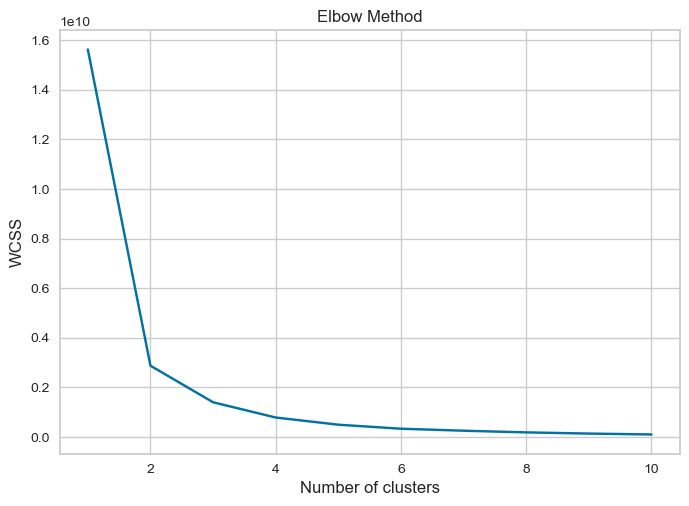

In [98]:
# Data untuk clustering (target)
X = clus[["GDP per capita"]]

# Menggunakan Elbow Method untuk menentukan jumlah cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(
        "WCSS for", i, "clusters:", kmeans.inertia_  # Penambahan pencetakan nilai WCSS
    )

# Plotting Elbow Method
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

### Liat silhouette score tiap cluster

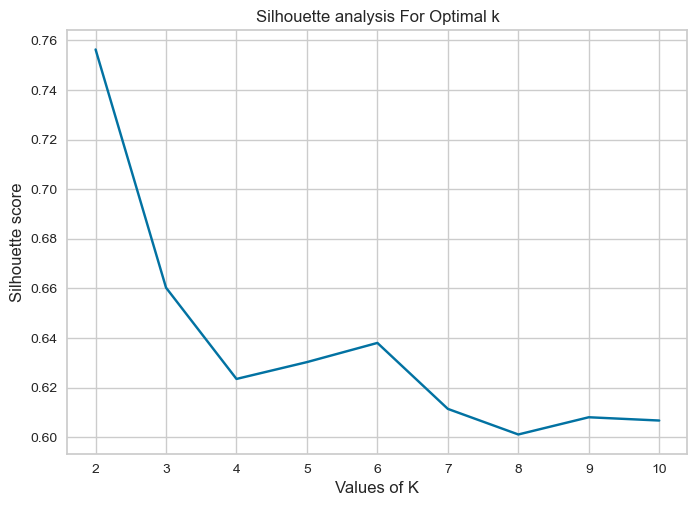

In [99]:
# Data frame yang digunakan dalam clustering 
X = clus[["GDP per capita"]]

# Range jumlah cluster yang akan dievaluasi
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []

# Loop untuk tiap jml cluster dan menghitung silhouette score
for num_clusters in range_n_clusters:
    # Inisialisasi KMeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # Menghitung silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))

# Plot Silhouette Score untuk setiap jumlah cluster
plt.plot(range_n_clusters, silhouette_avg, "bx-")
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

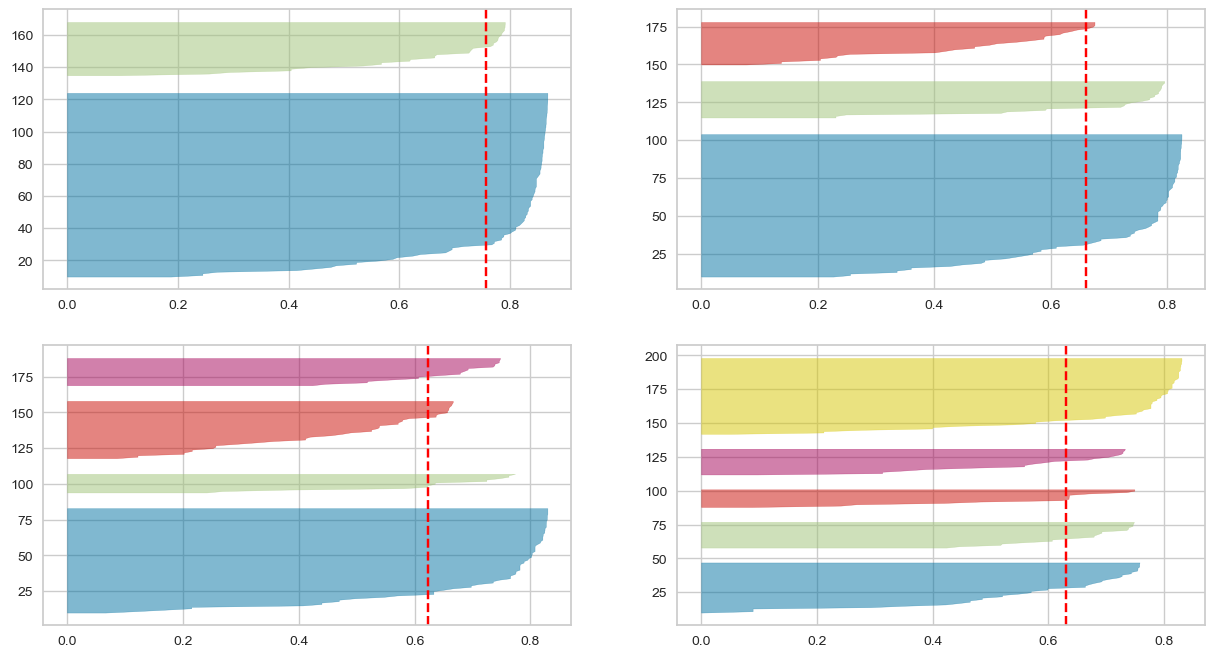

In [101]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i in [2, 3, 4, 5]:
    """
    Create KMeans instance for different number of clusters
    """
    km = KMeans(
        n_clusters=i, init="k-means++", n_init=10, max_iter=100, random_state=42
    )
    q, mod = divmod(i, 2)
    """
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    """
    visualizer = SilhouetteVisualizer(km, colors="yellowbrick", ax=ax[q - 1][mod])
    visualizer.fit(X)

### Hal yg harus diinget pas ngitung silhouette coefficient:

- Nilai koefisien silhouette antara -1 sampe 1.<br>
- Skor 1 itu yang paling oke, artinya data point i itu rapat banget di dalam kluster dia dan jauh banget dari kluster yang lain.<br>
- Nilai yang paling jelek itu -1. Nilai yang deket ke 0 itu artinya kluster saling numpuk gitu, overlapping.

In [103]:
# Menghitung silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.606758013895495


### Melihat ciri-ciri dari tiap cluster

In [104]:
# Melakukan clustering
n_clusters_gdp = 2  # jumlah cluster yg optimal pada kurva = 2

kmeans_pendapatan = KMeans(n_clusters=n_clusters_gdp, init="k-means++", random_state=42)

clus["Cluster"] = kmeans_pendapatan.fit_predict(clus[["GDP per capita"]])

clus

,Country,Continent,GDP per capita,Death rate,Exports,Imports,Infant mortality rate,Life expectancy at birth,Unemployment rate,Birth rate,Cluster
0,United States,America,40100,8.25,7.950000e+11,1.476000e+12,6.50,77.71,5.5,14.14,1
1,Norway,Europe,40000,9.45,7.664000e+10,4.596000e+10,3.70,79.40,4.3,11.67,1
2,Hong Kong,Asia,34200,5.98,2.681000e+11,2.759000e+11,2.97,81.39,6.7,7.23,1
3,Switzerland,Europe,33800,8.48,1.307000e+11,1.211000e+11,4.39,80.39,3.4,9.77,1
4,Denmark,Europe,32200,10.43,7.306000e+10,6.345000e+10,4.56,77.62,6.2,11.36,1
...,...,...,...,...,...,...,...,...,...,...,...
144,Madagascar,Africa,800,11.35,8.682000e+08,1.147000e+09,76.83,56.95,NaN,41.66,0
145,Yemen,Asia,800,8.53,4.468000e+09,3.734000e+09,61.50,61.75,35.0,43.07,0
146,Tanzania,Africa,700,16.71,1.248000e+09,1.972000e+09,98.54,45.24,NaN,38.16,0
147,Burundi,Africa,600,17.43,3.184000e+07,1.382000e+08,69.29,43.50,NaN,39.66,0


In [105]:
# Membuat kolom 'Category' dengan apply dan lambda
clus["Category"] = clus["Cluster"].apply(
    lambda x: "Kurang Sejahtera" if x == 0 else "Sejahtera"
)

clus

,Country,Continent,GDP per capita,Death rate,Exports,Imports,Infant mortality rate,Life expectancy at birth,Unemployment rate,Birth rate,Cluster,Category
0,United States,America,40100,8.25,7.950000e+11,1.476000e+12,6.50,77.71,5.5,14.14,1,Sejahtera
1,Norway,Europe,40000,9.45,7.664000e+10,4.596000e+10,3.70,79.40,4.3,11.67,1,Sejahtera
2,Hong Kong,Asia,34200,5.98,2.681000e+11,2.759000e+11,2.97,81.39,6.7,7.23,1,Sejahtera
3,Switzerland,Europe,33800,8.48,1.307000e+11,1.211000e+11,4.39,80.39,3.4,9.77,1,Sejahtera
4,Denmark,Europe,32200,10.43,7.306000e+10,6.345000e+10,4.56,77.62,6.2,11.36,1,Sejahtera
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Madagascar,Africa,800,11.35,8.682000e+08,1.147000e+09,76.83,56.95,NaN,41.66,0,Kurang Sejahtera
145,Yemen,Asia,800,8.53,4.468000e+09,3.734000e+09,61.50,61.75,35.0,43.07,0,Kurang Sejahtera
146,Tanzania,Africa,700,16.71,1.248000e+09,1.972000e+09,98.54,45.24,NaN,38.16,0,Kurang Sejahtera
147,Burundi,Africa,600,17.43,3.184000e+07,1.382000e+08,69.29,43.50,NaN,39.66,0,Kurang Sejahtera


- ngeliat rata-rata nilai metriksnya

In [106]:
clus

clus.to_csv('df_sh_clus.csv', index=True)

In [45]:
ctm = clus.copy()
ctm = clus.groupby("Category").mean()

ctm

,GDP per capita,Death rate,Exports,Imports,Infant mortality rate,Life expectancy at birth,Unemployment rate,Birth rate,Cluster
Category,,,,,,,,,
Kurang Sejahtera,5066.391304,10.386609,2.112294e+10,1.910102e+10,45.498696,63.526000,17.384946,24.850000,0.0
Sejahtera,27102.941176,8.086765,1.853201e+11,1.916401e+11,5.882059,78.450588,6.497059,11.877353,1.0


## Buat dataframe buat data avg Silhouette Score tiap cluster

- Ini akan digunakan untu visualisasi di Looker Studio

In [46]:
# Data silhouette sebelumnya
data = {
    "Clusters": [2, 3, 4, 5, 6, 7, 8],
    "Avg Silhouette Score": [
        0.7562992771241257,
        0.6602955540221587,
        0.6235209880161864,
        0.6303057046910485,
        0.635342591965329,
        0.611313907018759,
        0.6055016945189354,
    ],
}

# bikin DataFrame
sh = pd.DataFrame(data)

sh

,Clusters,Avg Silhouette Score
0,2,0.756299
1,3,0.660296
2,4,0.623521
3,5,0.630306
4,6,0.635343
5,7,0.611314
6,8,0.605502


In [47]:
# sh.to_csv('clustering_silhouette.csv', index=True)

## Buat dataframe untuk data WCSS
##### ini bakal digunakan untuk proses visualisasi bagian KMeans

In [48]:
clus["Cluster"].value_counts()

0    115
1     34
Name: Cluster, dtype: int64

In [49]:
# Data wcss sebelumnya
data = {
    "Clusters": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "WCSS": [
        15618287297.315434,
        2875111033.2736573,
        1402278346.76951,
        787065947.7351915,
        498336002.2869674,
        336127526.0964913,
        256065954.90467966,
        188497117.96834117,
        140803229.0794523,
        104487538.50403948,
    ],
}

# bikin DataFrame
wx = pd.DataFrame(data)

wx

,Clusters,WCSS
0,1,1.561829e+10
1,2,2.875111e+09
2,3,1.402278e+09
3,4,7.870659e+08
4,5,4.983360e+08
5,6,3.361275e+08
6,7,2.560660e+08
7,8,1.884971e+08
8,9,1.408032e+08
9,10,1.044875e+08


In [50]:
# wx.to_csv('kmeans_wcss.csv', index=True)

In [51]:
# clus.to_csv('cluster_fix.csv', index=True)